# Análisis Training Logs
Separación de las primeras 40,000 partidas (self-play) y el resto (vs heurísticas).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('logs/training_results_only_B_and_C.csv')
df.head()

,worker,seed,player_a,player_b,first_player,winner,moves
0,0,911,Group C,Group B,Group C,draw,42
1,0,911,Group B,Group C,Group C,Group C,26
2,0,911,Group B,Group C,Group B,Group C,19
3,0,911,Group C,Group B,Group C,Group B,25
4,0,911,Group C,Group B,Group B,Group C,25


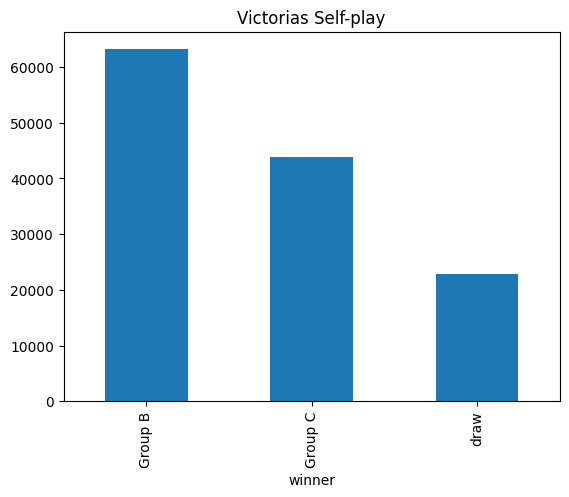

In [4]:
# victorias self-play
df['winner'].value_counts().plot(kind='bar')
plt.title('Victorias Self-play')
plt.show()

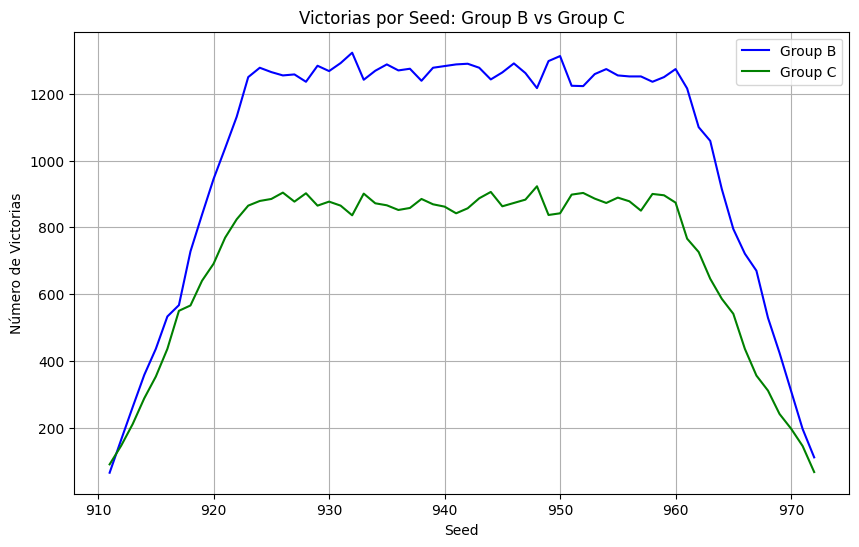

In [5]:
# Filtrar las partidas ganadas por cada jugador
df_group_b = df[df['winner'] == 'Group B']
df_group_c = df[df['winner'] == 'Group C']

# Contar las victorias por seed para cada grupo
victorias_b = df_group_b.groupby('seed').size()
victorias_c = df_group_c.groupby('seed').size()

# Graficar las victorias por seed
plt.figure(figsize=(10, 6))
plt.plot(victorias_b.index, victorias_b.values, label='Group B', color='blue')
plt.plot(victorias_c.index, victorias_c.values, label='Group C', color='green')
plt.title('Victorias por Seed: Group B vs Group C')
plt.xlabel('Seed')
plt.ylabel('Número de Victorias')
plt.legend()
plt.grid(True)
plt.show()


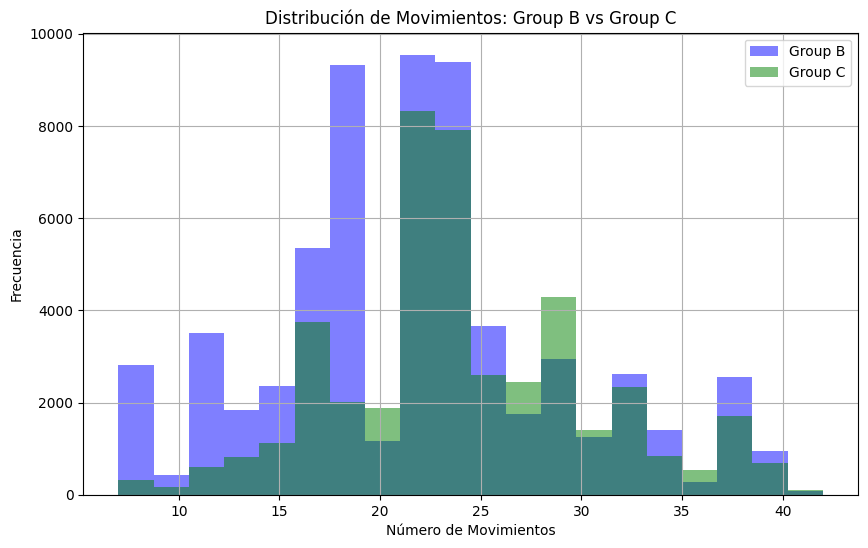

In [6]:
# Graficar la distribución de movimientos por grupo
plt.figure(figsize=(10, 6))
plt.hist(df_group_b['moves'], bins=20, alpha=0.5, label='Group B', color='blue')
plt.hist(df_group_c['moves'], bins=20, alpha=0.5, label='Group C', color='green')
plt.title('Distribución de Movimientos: Group B vs Group C')
plt.xlabel('Número de Movimientos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()


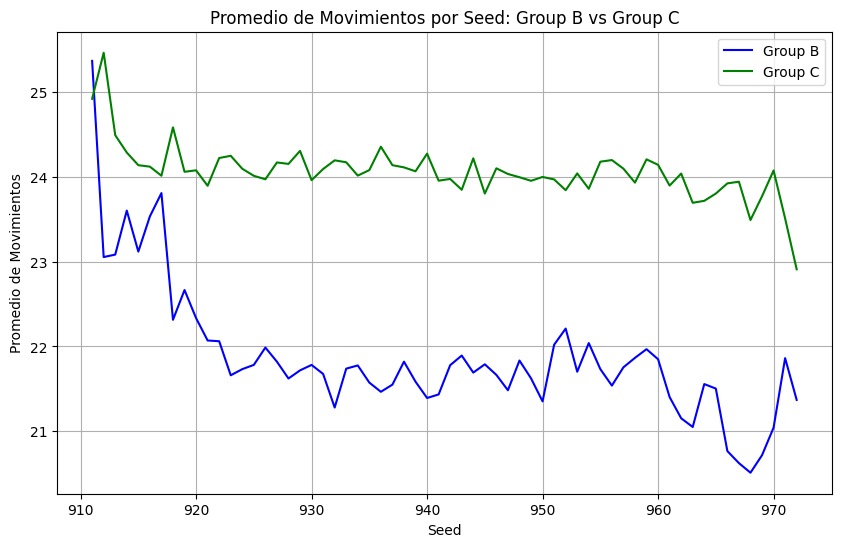

In [7]:
# Promedio de movimientos por seed para cada grupo
promedio_b = df_group_b.groupby('seed')['moves'].mean()
promedio_c = df_group_c.groupby('seed')['moves'].mean()

# Graficar el promedio de movimientos
plt.figure(figsize=(10, 6))
plt.plot(promedio_b.index, promedio_b.values, label='Group B', color='blue')
plt.plot(promedio_c.index, promedio_c.values, label='Group C', color='green')
plt.title('Promedio de Movimientos por Seed: Group B vs Group C')
plt.xlabel('Seed')
plt.ylabel('Promedio de Movimientos')
plt.legend()
plt.grid(True)
plt.show()


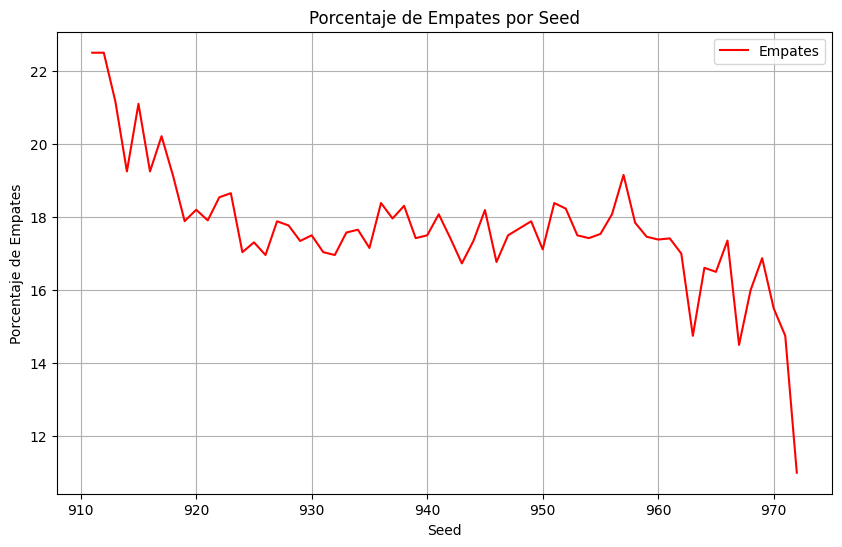

In [8]:
# Filtrar los empates
df_draws = df[df['winner'] == 'draw']

# Calcular el porcentaje de empates por seed
empates = df_draws.groupby('seed').size() / df.groupby('seed').size() * 100

# Graficar el porcentaje de empates
plt.figure(figsize=(10, 6))
plt.plot(empates.index, empates.values, label='Empates', color='red')
plt.title('Porcentaje de Empates por Seed')
plt.xlabel('Seed')
plt.ylabel('Porcentaje de Empates')
plt.legend()
plt.grid(True)
plt.show()


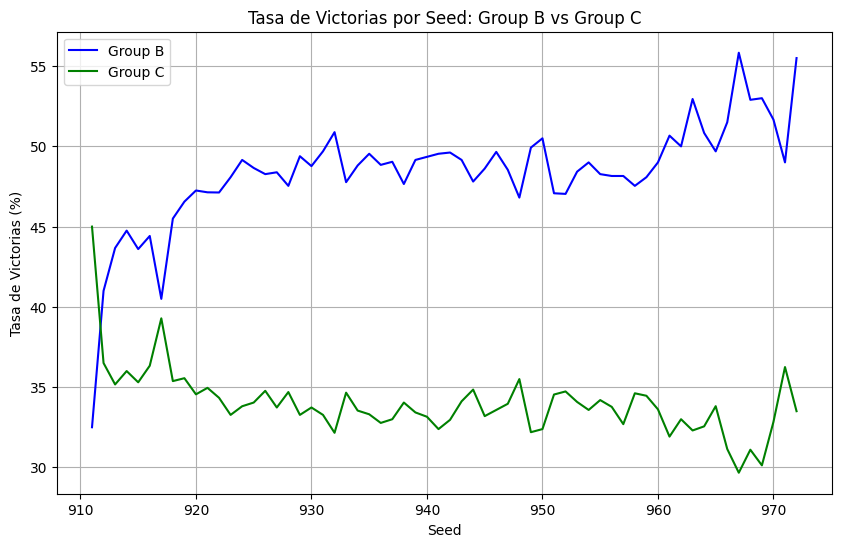

In [9]:
# Contar victorias por cada jugador
victorias_b = df[df['winner'] == 'Group B'].groupby('seed').size()
victorias_c = df[df['winner'] == 'Group C'].groupby('seed').size()

# Total de partidas por seed
total_partidas = df.groupby('seed').size()

# Calcular tasa de victorias para cada grupo
tasa_victorias_b = victorias_b / total_partidas * 100
tasa_victorias_c = victorias_c / total_partidas * 100

# Graficar tasa de victorias
plt.figure(figsize=(10, 6))
plt.plot(tasa_victorias_b.index, tasa_victorias_b.values, label='Group B', color='blue')
plt.plot(tasa_victorias_c.index, tasa_victorias_c.values, label='Group C', color='green')
plt.title('Tasa de Victorias por Seed: Group B vs Group C')
plt.xlabel('Seed')
plt.ylabel('Tasa de Victorias (%)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Promedio de movimientos por jugador
promedio_movimientos_b = df[df['winner'] == 'Group B']['moves'].mean()
promedio_movimientos_c = df[df['winner'] == 'Group C']['moves'].mean()

# Mostrar promedio de movimientos
print(f'Promedio de movimientos - Group B: {promedio_movimientos_b}')
print(f'Promedio de movimientos - Group C: {promedio_movimientos_c}')


Promedio de movimientos - Group B: 21.74739739898111
Promedio de movimientos - Group C: 24.06059915188546


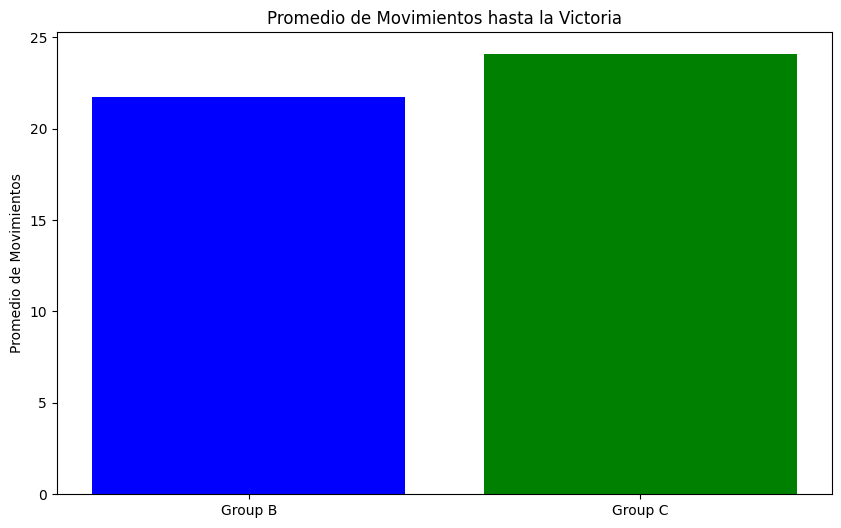

In [11]:
# Promedio de movimientos hasta la victoria por jugador
promedio_movimientos_b = df[df['winner'] == 'Group B']['moves'].mean()
promedio_movimientos_c = df[df['winner'] == 'Group C']['moves'].mean()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(['Group B', 'Group C'], [promedio_movimientos_b, promedio_movimientos_c], color=['blue', 'green'])
plt.title('Promedio de Movimientos hasta la Victoria')
plt.ylabel('Promedio de Movimientos')
plt.show()


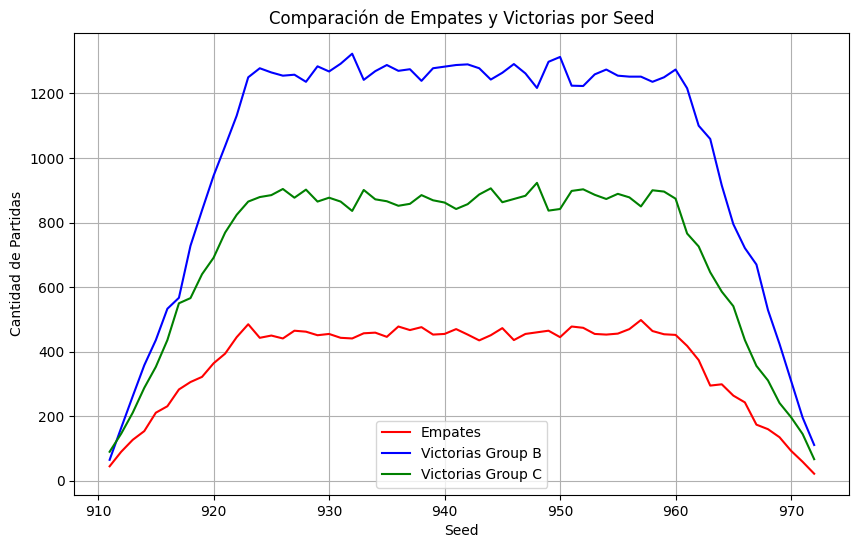

In [13]:
# Contar los empates
empates = df[df['winner'] == 'draw'].groupby('seed').size()

# Graficar empates vs victorias
plt.figure(figsize=(10, 6))
plt.plot(empates.index, empates.values, label='Empates', color='red')
plt.plot(victorias_b.index, victorias_b.values, label='Victorias Group B', color='blue')
plt.plot(victorias_c.index, victorias_c.values, label='Victorias Group C', color='green')
plt.title('Comparación de Empates y Victorias por Seed')
plt.xlabel('Seed')
plt.ylabel('Cantidad de Partidas')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_15100\1980373330.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  victorias_start_b = df[df['first_player'] == 'Group B'][df['winner'] == 'Group B'].groupby('seed').size()
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_15100\1980373330.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  victorias_start_c = df[df['first_player'] == 'Group C'][df['winner'] == 'Group C'].groupby('seed').size()


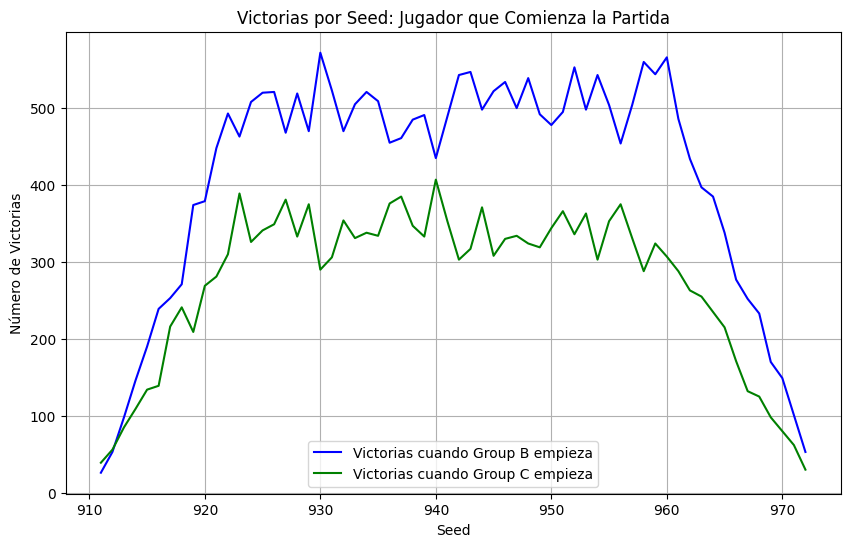

In [14]:
# Contar victorias cuando 'Group C' o 'Group B' comienza
victorias_start_b = df[df['first_player'] == 'Group B'][df['winner'] == 'Group B'].groupby('seed').size()
victorias_start_c = df[df['first_player'] == 'Group C'][df['winner'] == 'Group C'].groupby('seed').size()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(victorias_start_b.index, victorias_start_b.values, label='Victorias cuando Group B empieza', color='blue')
plt.plot(victorias_start_c.index, victorias_start_c.values, label='Victorias cuando Group C empieza', color='green')
plt.title('Victorias por Seed: Jugador que Comienza la Partida')
plt.xlabel('Seed')
plt.ylabel('Número de Victorias')
plt.legend()
plt.grid(True)
plt.show()


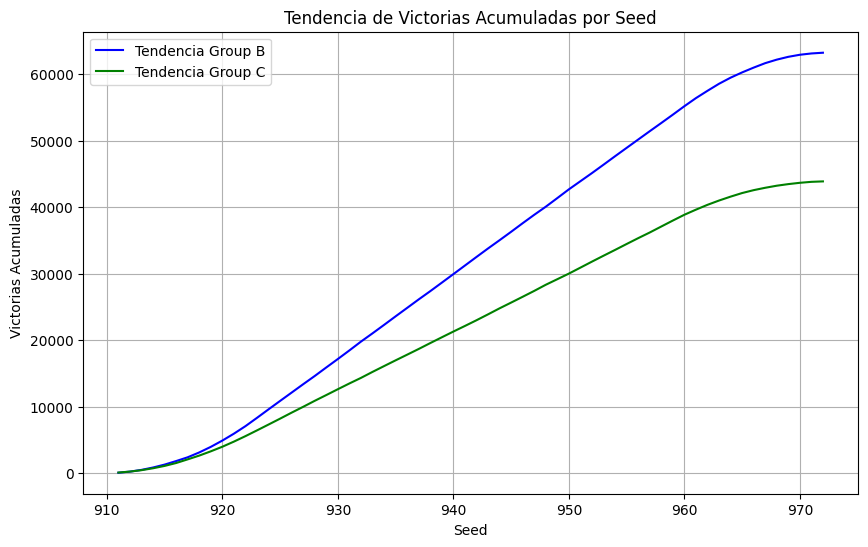

In [15]:
# Agrupar victorias por seed y ver la tendencia
victorias_b_tendencia = df[df['winner'] == 'Group B'].groupby('seed').size().cumsum()
victorias_c_tendencia = df[df['winner'] == 'Group C'].groupby('seed').size().cumsum()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(victorias_b_tendencia.index, victorias_b_tendencia.values, label='Tendencia Group B', color='blue')
plt.plot(victorias_c_tendencia.index, victorias_c_tendencia.values, label='Tendencia Group C', color='green')
plt.title('Tendencia de Victorias Acumuladas por Seed')
plt.xlabel('Seed')
plt.ylabel('Victorias Acumuladas')
plt.legend()
plt.grid(True)
plt.show()


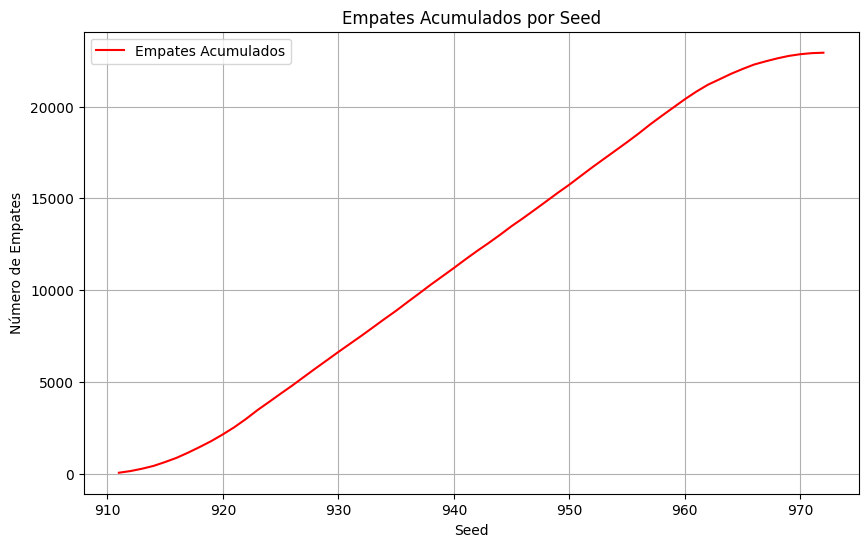

In [16]:
# Analizar empates a lo largo del tiempo
empates_acumulados = df[df['winner'] == 'draw'].groupby('seed').size().cumsum()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(empates_acumulados.index, empates_acumulados.values, label='Empates Acumulados', color='red')
plt.title('Empates Acumulados por Seed')
plt.xlabel('Seed')
plt.ylabel('Número de Empates')
plt.legend()
plt.grid(True)
plt.show()
